## **TASK 1 - Prediction using Supervised ML**
Prediction on the percentage of marks of the students based on the number of hours they studied

### *Shubham Mengarti*

In [7]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import animation
# from sklearn.metrics import mean_absolute_error

In [5]:
# Reading the Data 
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Check if there any null value in the Dataset
data.isnull == True

False

**There is no null value in the Dataset so, we can now visualize our Data.**

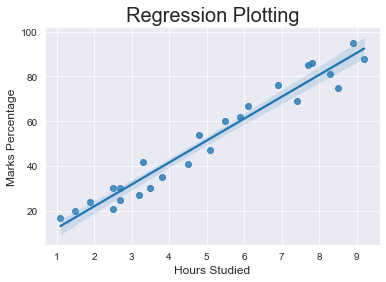

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plotting',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**It is confirmed that the variables are positively correlated.**

### Training the Model
#### 1) Splitting the Data

In [109]:
# Defining X and y from the Data
from sklearn.model_selection import train_test_split
X = data.drop('Scores',axis=1)  
y = data['Scores']
# Spliting the Data in two
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### 2) Fitting the Data into the model

In [110]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
Hours,9.941678


#### Predicting the Percentage of Marks

In [112]:
prediction = lm.predict(X_test)
# prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

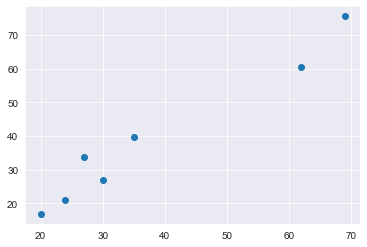

In [113]:
plt.scatter(y_test,prediction)

#### Comparing the Predicted Marks with the Actual Marks

In [114]:
compare = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': prediction})
compare

,Actual Marks,Predicted Marks
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


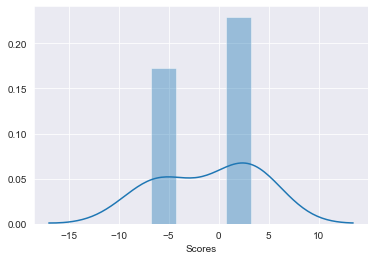

In [115]:
sns.distplot((y_test-prediction),bins=4)

In [116]:
# Calculating the accuracy of the model
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

4.130879918502486

In [117]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

4.5092043283688055

**Small value of Mean absolute error and square root of mean squared error states that the chances of error or wrong forecasting through the model are very less.**

#### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [118]:
hours = [9.25]
Predicted_Hours = lm.predict([hours])
print("No of Hours = {}".format(hours))
print(answer)

No of Hours = [9.25]
[92.91505723]


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.91 marks.**